# Reddit

## Project Members:
- Omar Alkhayyat (2121118117)
- Ali Behbehani (2132131280)
- Essa Alansari (2121117232)


In [1]:
import requests
import praw
import pandas as pd
import sys
import os
import numpy as np
from pandas import datetime
import altair as alt
from altair import *

In [2]:
reddit = praw.Reddit(client_id='UJ7cIcf2yoZSNg',
                    client_secret='SC1SH-Jc3dqwhjeplg8sWGqRS-g'
                    ,password='abdullah-10' ,
                    user_agent='kuwaituniversity' ,
                    username='omaralkhayyat')

In [3]:
subriddet = reddit.subreddit('Popular')

In [4]:
authors = [x.author for x in subriddet.gilded()]

In [12]:
submission_dfs = []

for a in authors:
    # check if the csv file for the author name exists
    csv_file_name = "{}_submissions.csv".format(a.name)
    # the file exists, so lets load the csv as a dataframe
    if os.path.exists(csv_file_name):
        print("found {}, I will load the dataframe".format(csv_file_name))
        df = pd.read_csv(csv_file_name)
    else:
        print("did not find {}, loading from api".format(csv_file_name))
        
        #load submissions from reddit
        author_submissions = reddit.redditor(a.name).submissions

        # fetch the information for each submission of top 100 hot submissions
        sub_data = [
            {
                "title":x.title,
                "score":x.score,
                "num_comments":x.num_comments,
                "selftext":x.selftext,
                "ID":x.id,
                "Author":x.author.name,
                "Submission_Created":x.created_utc
            } for x in author_submissions.hot(limit=100)
        ]
        
    
        # create dataframe for the submissions of that author
        df = pd.DataFrame(sub_data)
                
        # store it, so we dont fetch it next time
        df.to_csv(csv_file_name)
    
    # add the author submission df to submission_dfs
    submission_dfs.append(df)

# loop ended, now combine all the dfs into a single df
subs_df = pd.concat(submission_dfs)

did not find jorshrod_submissions.csv, loading from api
did not find attorneyriffic_submissions.csv, loading from api
did not find MasterBac_submissions.csv, loading from api
did not find AstralWave_submissions.csv, loading from api
did not find Chinguentes_submissions.csv, loading from api
did not find gazlegeoff_submissions.csv, loading from api
did not find outer_sect_disciple_submissions.csv, loading from api
did not find Cassian_Andor_submissions.csv, loading from api
did not find boglehead28_submissions.csv, loading from api
did not find GuitarCFD_submissions.csv, loading from api
did not find Max_Trollbot__submissions.csv, loading from api
did not find bwburke94_submissions.csv, loading from api
did not find PM_Me_YourFav_Song_submissions.csv, loading from api
did not find mrmattolsen_submissions.csv, loading from api
did not find flakingnapstich_submissions.csv, loading from api
did not find DoctorWhosOnFirst_submissions.csv, loading from api
did not find Paulingtons_submission

In [13]:
subs_df.head()

Author      ID  Submission_Created  num_comments  score  \
0  jorshrod  7l56sb        1.513811e+09           362   4804   
1  jorshrod  7l4b8z        1.513803e+09            11      1   
2  jorshrod  7l48mr        1.513802e+09             2      1   
3  jorshrod  7kmbct        1.513615e+09             8      1   
4  jorshrod  7j47a0        1.513018e+09             4      1   

                                            selftext  \
0  I was having an EMG test today and started tal...   
1  [My IGS REP](https://www.reddit.com/r/IGSRep/c...   
2  [FIRST PAGE](https://www.reddit.com/r/IGSRep/c...   
3  [My IGS REP](https://www.reddit.com/r/IGSRep/c...   
4  [My IGS REP](https://www.reddit.com/r/IGSRep/c...   

                                               title  
0      How much bandwidth does the spinal cord have?  
1  [H] Wasteland 2: Director's Cut, Furi, Worms W...  
2                          Jorshrod's IGS Rep Page 2  
3  [H] Wasteland 2: Directors Cut, BlazBlue: Chro...  
4  [H]Wasteland 2:Director's, Furi, H1Z1, Offworl...

In [14]:
subs_df.Submission_Created = subs_df.Submission_Created.apply(datetime.fromtimestamp)

In [27]:
subs_df.to_csv("subs_df.csv")

In [17]:
cd_data = [
   {
       "name":x.name,
       "comment_karma":x.comment_karma,
       "post_karma":x.link_karma,
       "is_gold":x.is_gold,
       "is_mod":x.is_mod,
       "ID":x.id,
       "is employee":x.is_employee,
       "is_friend":x.is_friend,
       
       
   }
       
   for x in authors]

In [18]:
cdf = pd.DataFrame(cd_data)

In [20]:
cdf.head()

ID  comment_karma  is employee  is_friend  is_gold  is_mod  \
0   4amx5          11338        False      False     True   False   
1   60siq          33855        False      False     True   False   
2   mnal5            294        False      False     True   False   
3  11absx            891        False      False     True   False   
4   6k069            254        False      False     True   False   

             name  post_karma  
0        jorshrod        9785  
1  attorneyriffic         903  
2       MasterBac        3699  
3      AstralWave       10858  
4     Chinguentes        8905

In [21]:
cdf.to_csv("cdf.csv")

In [26]:
cdf

Created       ID  comment_karma  is employee  is_friend  \
0  2011-04-12 05:28:43    53a1t          51482        False      False   
1  2013-09-01 08:23:27    cyv1d          34593        False      False   
2  2016-12-02 15:47:04   1397sf          10260        False      False   
3  2015-05-10 15:45:38    ne42w          32449        False      False   
4  2008-02-13 18:59:48    3370f          20585        False      False   
5  2013-07-06 00:35:06    c9xtv           5461        False      False   
6  2016-07-16 09:10:54    zjlzm           1825        False      False   
7  2017-07-11 01:44:50  6ot8gst           1788        False      False   
8  2016-07-14 21:08:03    zi9rv           9126        False      False   
9  2012-03-15 17:42:23    76fd9          59351        False      False   
10 2011-05-19 03:06:14    596ov          97299        False      False   
11 2011-05-07 23:47:56    57d8x        2624750        False      False   
12 2011-01-09 15:22:40    4pfib          27241        False      False   
13 2011-11-30 14:21:53    6cc9f         101345        False      False   
14 2011-04-10 11:54:08    5300k          26514        False      False   
15 2013-09-09 15:12:01    d2gxt            261        False      False   
16 2016-12-07 19:18:52   13e0bc           4023        False      False   
17 2016-06-26 04:57:47    z0n23           3210        False      False   
18 2015-11-01 02:02:36    rmpx2              1        False      False   
19 2013-01-09 04:20:55    a5kq5          50804        False      False   
20 2012-09-14 07:59:13    906f4           2130        False      False   
21 2017-01-14 15:45:20   14fg9m           6323        False      False   
22 2015-08-01 00:46:51    p7xgy            398        False      False   
23 2016-12-24 21:56:20   13tvxl           1202        False      False   
24 2014-05-27 17:07:26    gqh2m           3208        False      False   
25 2017-11-05 15:08:46  jvmpjv4           3349        False      False   
26 2017-02-08 07:53:35   156sz4          81994        False      False   
27 2014-05-18 19:43:57    gm8hr          55252        False      False   
28 2016-05-31 21:40:33    ycpwn           3117        False      False   
29 2014-12-24 22:33:04    kat4q          15309        False      False   
..                 ...      ...            ...          ...        ...   
70 2012-06-07 01:29:24    7x409          14692        False      False   
71 2017-12-17 22:57:38  onrvuue             36        False      False   
72 2016-07-23 14:41:17    zqv5c           7348        False      False   
73 2008-05-23 00:42:55    35h0a          53777        False      False   
74 2015-04-05 04:37:19    mpi3b           1958        False      False   
75 2017-06-18 01:33:32  4dok57o             35        False      False   
76 2015-03-12 14:02:54    m3f53           1427        False      False   
77 2016-01-27 01:38:22    u551h           8640        False      False   
78 2010-03-22 02:32:03    3yb46          16351        False      False   
79 2017-05-14 00:50:07  11fo9a3           2927        False      False   
80 2012-08-10 00:22:52    8m8sc         133102        False      False   
81 2015-12-23 22:51:38    t6qb3           3245        False      False   
82 2016-09-18 18:05:31   11hu62          14058        False      False   
83 2016-10-19 19:57:13   128njv         146857        False      False   
84 2017-05-26 14:38:28  27i1nkd           6391        False      False   
85 2015-12-27 22:24:11    t9rl2          11989        False      False   
86 2015-01-04 09:24:52    khwq5           4849        False      False   
87 2017-10-24 04:40:50  if5mggm           1227        False      False   
88 2012-11-05 13:06:13    9ibo8          50768        False      False   
89 2012-09-29 09:16:26    95qob            255        False      False   
90 2017-10-26 13:08:12  iow88om           1804        False      False   
91 2013-08-30 09:49:25    cy3j5           6114        False      False   
92 2013-03-24 07:36

In [22]:
final_df = cdf.merge(subs_df, how="outer", left_on="name", right_on="Author")

In [23]:
final_df

ID_x  comment_karma  is employee  is_friend  is_gold  is_mod  \
0     4amx5          11338        False      False     True   False   
1     4amx5          11338        False      False     True   False   
2     4amx5          11338        False      False     True   False   
3     4amx5          11338        False      False     True   False   
4     4amx5          11338        False      False     True   False   
5     4amx5          11338        False      False     True   False   
6     4amx5          11338        False      False     True   False   
7     4amx5          11338        False      False     True   False   
8     4amx5          11338        False      False     True   False   
9     4amx5          11338        False      False     True   False   
10    4amx5          11338        False      False     True   False   
11    4amx5          11338        False      False     True   False   
12    4amx5          11338        False      False     True   False   
13    4amx5          11338        False      False     True   False   
14    4amx5          11338        False      False     True   False   
15    4amx5          11338        False      False     True   False   
16    4amx5          11338        False      False     True   False   
17    4amx5          11338        False      False     True   False   
18    4amx5          11338        False      False     True   False   
19    4amx5          11338        False      False     True   False   
20    4amx5          11338        False      False     True   False   
21    4amx5          11338        False      False     True   False   
22    4amx5          11338        False      False     True   False   
23    4amx5          11338        False      False     True   False   
24    4amx5          11338        False      False     True   False   
25    4amx5          11338        False      False     True   False   
26    4amx5          11338        False      False     True   False   
27    4amx5          11338        False      False     True   False   
28    4amx5          11338        False      False     True   False   
29    4amx5          11338        False      False     True   False   
...     ...            ...          ...        ...      ...     ...   
5207  bbuks          44880        False      False     True    True   
5208  bbuks          44880        False      False     True    True   
5209  bbuks          44880        False      False     True    True   
5210  bbuks          44880        False      False     True    True   
5211  bbuks          44880        False      False     True    True   
5212  bbuks          44880        False      False     True    True   
5213  bbuks          44880        False      False     True    True   
5214  bbuks          44880        False      False     True    True   
5215  bbuks          44880        False      False     True    True   
5216  bbuks          44880        False      False     True    True   
5217  bbuks          44880        False      False     True    True   
5218  bbuks          44880        False      False     True    True   
5219  bbuks          44880        False      False     True    True   
5220  bbuks          44880        False      False     True    True   
5221  bbuks          44880        False      False     True    True   
5222  bbuks          44880        False      False     True    True   
5223  bbuks          44880        False      False     True    True   
5224  bbuks          44880        False      False     True    True   
5225  bbuks          44880        False      False     True    True   
5226  bbuks          44880        False      False     True    True   
5227  bbuks          44880        False      False     True    True   
5228  bbuks          44880        False      False     True    True   
5229  bbuks          44880        False      False     True    True   
5230  bbuks          44880        False      False     True    True   
5231  bbuks          44880     

In [24]:
final_df.to_csv("final_df.csv")

In [2]:
fdf = pd.read_csv("final_df.csv")

In [4]:
fdf

Unnamed: 0   ID_x  comment_karma  is employee  is_friend  is_gold  \
0              0  4amx5          11338        False      False     True   
1              1  4amx5          11338        False      False     True   
2              2  4amx5          11338        False      False     True   
3              3  4amx5          11338        False      False     True   
4              4  4amx5          11338        False      False     True   
5              5  4amx5          11338        False      False     True   
6              6  4amx5          11338        False      False     True   
7              7  4amx5          11338        False      False     True   
8              8  4amx5          11338        False      False     True   
9              9  4amx5          11338        False      False     True   
10            10  4amx5          11338        False      False     True   
11            11  4amx5          11338        False      False     True   
12            12  4amx5          11338        False      False     True   
13            13  4amx5          11338        False      False     True   
14            14  4amx5          11338        False      False     True   
15            15  4amx5          11338        False      False     True   
16            16  4amx5          11338        False      False     True   
17            17  4amx5          11338        False      False     True   
18            18  4amx5          11338        False      False     True   
19            19  4amx5          11338        False      False     True   
20            20  4amx5          11338        False      False     True   
21            21  4amx5          11338        False      False     True   
22            22  4amx5          11338        False      False     True   
23            23  4amx5          11338        False      False     True   
24            24  4amx5          11338        False      False     True   
25            25  4amx5          11338        False      False     True   
26            26  4amx5          11338        False      False     True   
27            27  4amx5          11338        False      False     True   
28            28  4amx5          11338        False      False     True   
29            29  4amx5          11338        False      False     True   
...          ...    ...            ...          ...        ...      ...   
5207        5207  bbuks          44880        False      False     True   
5208        5208  bbuks          44880        False      False     True   
5209        5209  bbuks          44880        False      False     True   
5210        5210  bbuks          44880        False      False     True   
5211        5211  bbuks          44880        False      False     True   
5212        5212  bbuks          44880        False      False     True   
5213        5213  bbuks          44880        False      False     True   
5214        5214  bbuks          44880        False      False     True   
5215        5215  bbuks          44880        False      False     True   
5216        5216  bbuks          44880        False      False     True   
5217        5217  bbuks          44880        False      False     True   
5218        5218  bbuks          44880        False      False     True   
5219        5219  bbuks          44880        False      False     True   
5220        5220  bbuks          44880        False      False     True   
5221        5221  bbuks          44880        False      False     True   
5222        5222  bbuks          44880        False      False     True   
5223        5223  bbuks          44880        False      False     True   
5224        5224  bbuks          44880        False      False     True   
5225        5225  bbuks          44880        False      False     True   
5226        5226  bbuks          44880        False      False     True   
5227        5227  bbuks          44880        False      False     True   
5228        5228  bbuks        

In [3]:
fdf["Total_score"]= fdf.groupby("name").transform(np.sum).score
fdf["Total_num_comments"]= fdf.groupby("name").transform(np.sum).num_comments

In [9]:
fdf.dtypes

Unnamed: 0              int64
ID_x                   object
comment_karma           int64
is employee              bool
is_friend                bool
is_gold                  bool
is_mod                   bool
name                   object
post_karma              int64
Author                 object
ID_y                   object
Submission_Created     object
num_comments          float64
score                 float64
selftext               object
title                  object
Total_score           float64
Total_num_comments    float64
dtype: object

In [4]:
test = fdf.sample(3000)

In [42]:
test

Unnamed: 0     ID_x  comment_karma  is employee  is_friend  is_gold  \
4369        4369    702ov          16072        False      False     True   
3006        3006    81bjr          20705        False      False     True   
5020        5020    fxvfr         324627        False      False     True   
3036        3036    ep4r2          31729        False      False     True   
4364        4364  9xgkiz3          28164        False      False     True   
3097        3097    ep4r2          31729        False      False     True   
5069        5069    b4m9h          64646        False      False     True   
2655        2655    4x68b         526856        False      False     True   
1898        1898    4hukh          82632        False      False     True   
3927        3927   17ed7y         106667        False      False     True   
832          832    6hzff          41181        False      False     True   
2350        2350    6zykq          20812        False      False     True   
4363        4363  9xgkiz3          28164        False      False     True   
159          159    60siq          33855        False      False     True   
3495        3495    3ekml         788878        False      False     True   
2389        2389    rpo6p           3980        False      False     True   
4541        4541  9tcikor           1703        False      False     True   
2698        2698    bcynk           3385        False      False     True   
4170        4170   13sogx            525        False      False     True   
1853        1853    4hukh          82632        False      False     True   
946          946    6fm0w         165640        False      False     True   
3125        3125    gmtl5           7069        False      False     True   
4913        4913    92cdm         110183        False      False     True   
910          910    6fm0w         165640        False      False     True   
2537        2537    j0r12          17672        False      False     True   
452          452    e1xb8         127100        False      False     True   
2887        2887     nmnn            543        False      False     True   
2513        2513    j0r12          17672        False      False     True   
3619        3619    b6g8f           4783        False      False     True   
1513        1513    3sch0         200909        False      False     True   
...          ...      ...            ...          ...        ...      ...   
2727        2727    3xro2          27341        False      False     True   
5146        5146    bbuks          44880        False      False     True   
2395        2395    rpo6p           3980        False      False     True   
2133        2133    h1zyl         131073        False      False     True   
3393        3393    368g9          23756        False      False     True   
932          932    6fm0w         165640        False      False     True   
2571        2571    602o7          22276        False      False     True   
4038        4038   12cfrx         132989        False      False     True   
4261        4261   13sogx            525        False      False     True   
2540        2540    j0r12          17672        False      False     True   
4529        4529    37c2y          28052        False      False     True   
4515        4515    37c2y          28052        False      False     True   
4906        4906    92cdm         110183        False      False     True   
2150        2150  ng6st76            334        False      False     True   
180          180    60siq          33855        False      False     True   
4982        4982    dk9up           1391        False      False     True   
2868        2868     nmnn            543        False      False     True   
1697        1697   11lfrn           3172        False      False     True   
4676        4676    dydyx          11569        False      False     True   
4370        4370    702ov          16072        False      False     True   
32

In [6]:
str(test.Submission_Created)
test.dtypes

Unnamed: 0              int64
ID_x                   object
comment_karma           int64
is employee              bool
is_friend                bool
is_gold                  bool
is_mod                   bool
name                   object
post_karma              int64
Author                 object
ID_y                   object
Submission_Created     object
num_comments          float64
score                 float64
selftext               object
title                  object
Total_score           float64
Total_num_comments    float64
dtype: object

In [7]:
test

Unnamed: 0     ID_x  comment_karma  is employee  is_friend  is_gold  \
1295        1295    53zso          47339        False      False     True   
4735        4735    j8ikd          63272        False      False     True   
4295        4295  9xgkiz3          28164        False      False     True   
4126        4126    pkkgh          11786        False      False     True   
22            22    4amx5          11338        False      False     True   
4301        4301  9xgkiz3          28164        False      False     True   
1747        1747    81k2o          11804        False      False     True   
1292        1292    53zso          47339        False      False     True   
4734        4734    j8ikd          63272        False      False     True   
4534        4534  9tcikor           1703        False      False     True   
2560        2560    602o7          22276        False      False     True   
734          734   10e2ef          55799        False      False     True   
912          912    6fm0w         165640        False      False     True   
1727        1727   11lfrn           3172        False      False     True   
2837        2837     nmnn            543        False      False     True   
4445        4445    702ov          16072        False      False     True   
1284        1284    53zso          47339        False      False     True   
1478        1478    3sch0         200909        False      False     True   
3368        3368    clwam           1798        False      False     True   
51            51    4amx5          11338        False      False     True   
1243        1243    dalvl          88257        False      False     True   
4574        4574  9tcikor           1703        False      False     True   
2219        2219  ng6st76            334        False      False     True   
3073        3073    ep4r2          31729        False      False     True   
5033        5033    iocnk          97488        False      False     True   
2705        2705    bcynk           3385        False      False     True   
739          739   10e2ef          55799        False      False     True   
2952        2952    81bjr          20705        False      False     True   
3955        3955   17ed7y         106667        False      False     True   
4393        4393    702ov          16072        False      False     True   
...          ...      ...            ...          ...        ...      ...   
3219        3219    gmtl5           7069        False      False     True   
5044        5044    b4m9h          64646        False      False     True   
1145        1145    tgezk             99        False      False     True   
2365        2365    6zykq          20812        False      False     True   
4707        4707    dydyx          11569        False      False     True   
1724        1724   11lfrn           3172        False      False     True   
2659        2659    4x68b         526856        False      False     True   
3285        3285    d73zv          20183        False      False     True   
3804        3804    327vo          22887        False      False     True   
5175        5175    bbuks          44880        False      False     True   
1754        1754    81k2o          11804        False      False     True   
774          774    6hzff          41181        False      False     True   
852          852    6hzff          41181        False      False     True   
1298        1298    53zso          47339        False      False     True   
4859        4859    92cdm         110183        False      False     True   
3543        3543    3ekml         788878        False      False     True   
2600        2600    4x68b         526856        False      False     True   
1071        1071    874i6          41553        False      False     True   
2976        2976    81bjr          20705        False      False     True   
10            10    4amx5          11338        False      False     True   
39

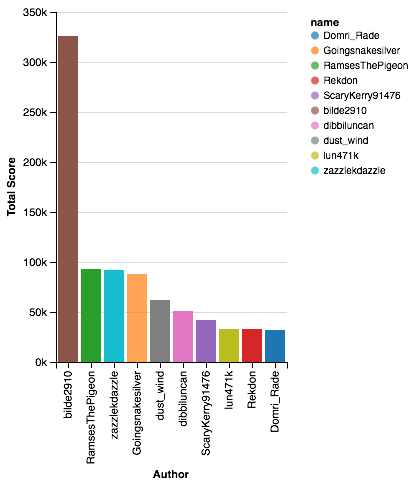

In [24]:
Chart(test.nlargest(440,"Total_score")).mark_bar().encode(
    x=X('Author:O', sort=SortField(field='Total_score', order='descending', op='max'),
        axis=Axis(title='Author')),
    y=Y('Total_score:Q',
        axis=Axis(title='Total Score')),
    color ="name"
        )

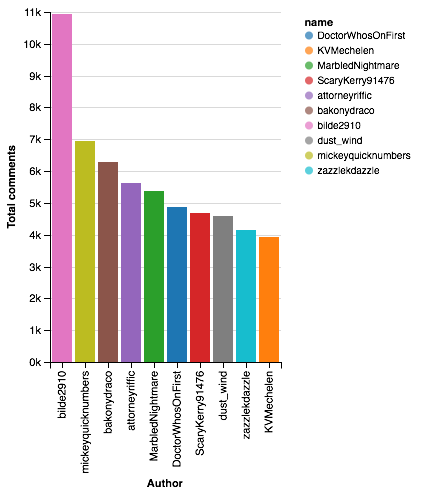

In [23]:
Chart(test.nlargest(480,"Total_num_comments")).mark_bar().encode(
    x=X('Author:O', sort=SortField(field='Total_num_comments', order='descending', op='max'),
        axis=Axis(title='Author')),
    y=Y('Total_num_comments:Q',
        axis=Axis(title='Total comments')),
    color ="name"
        )

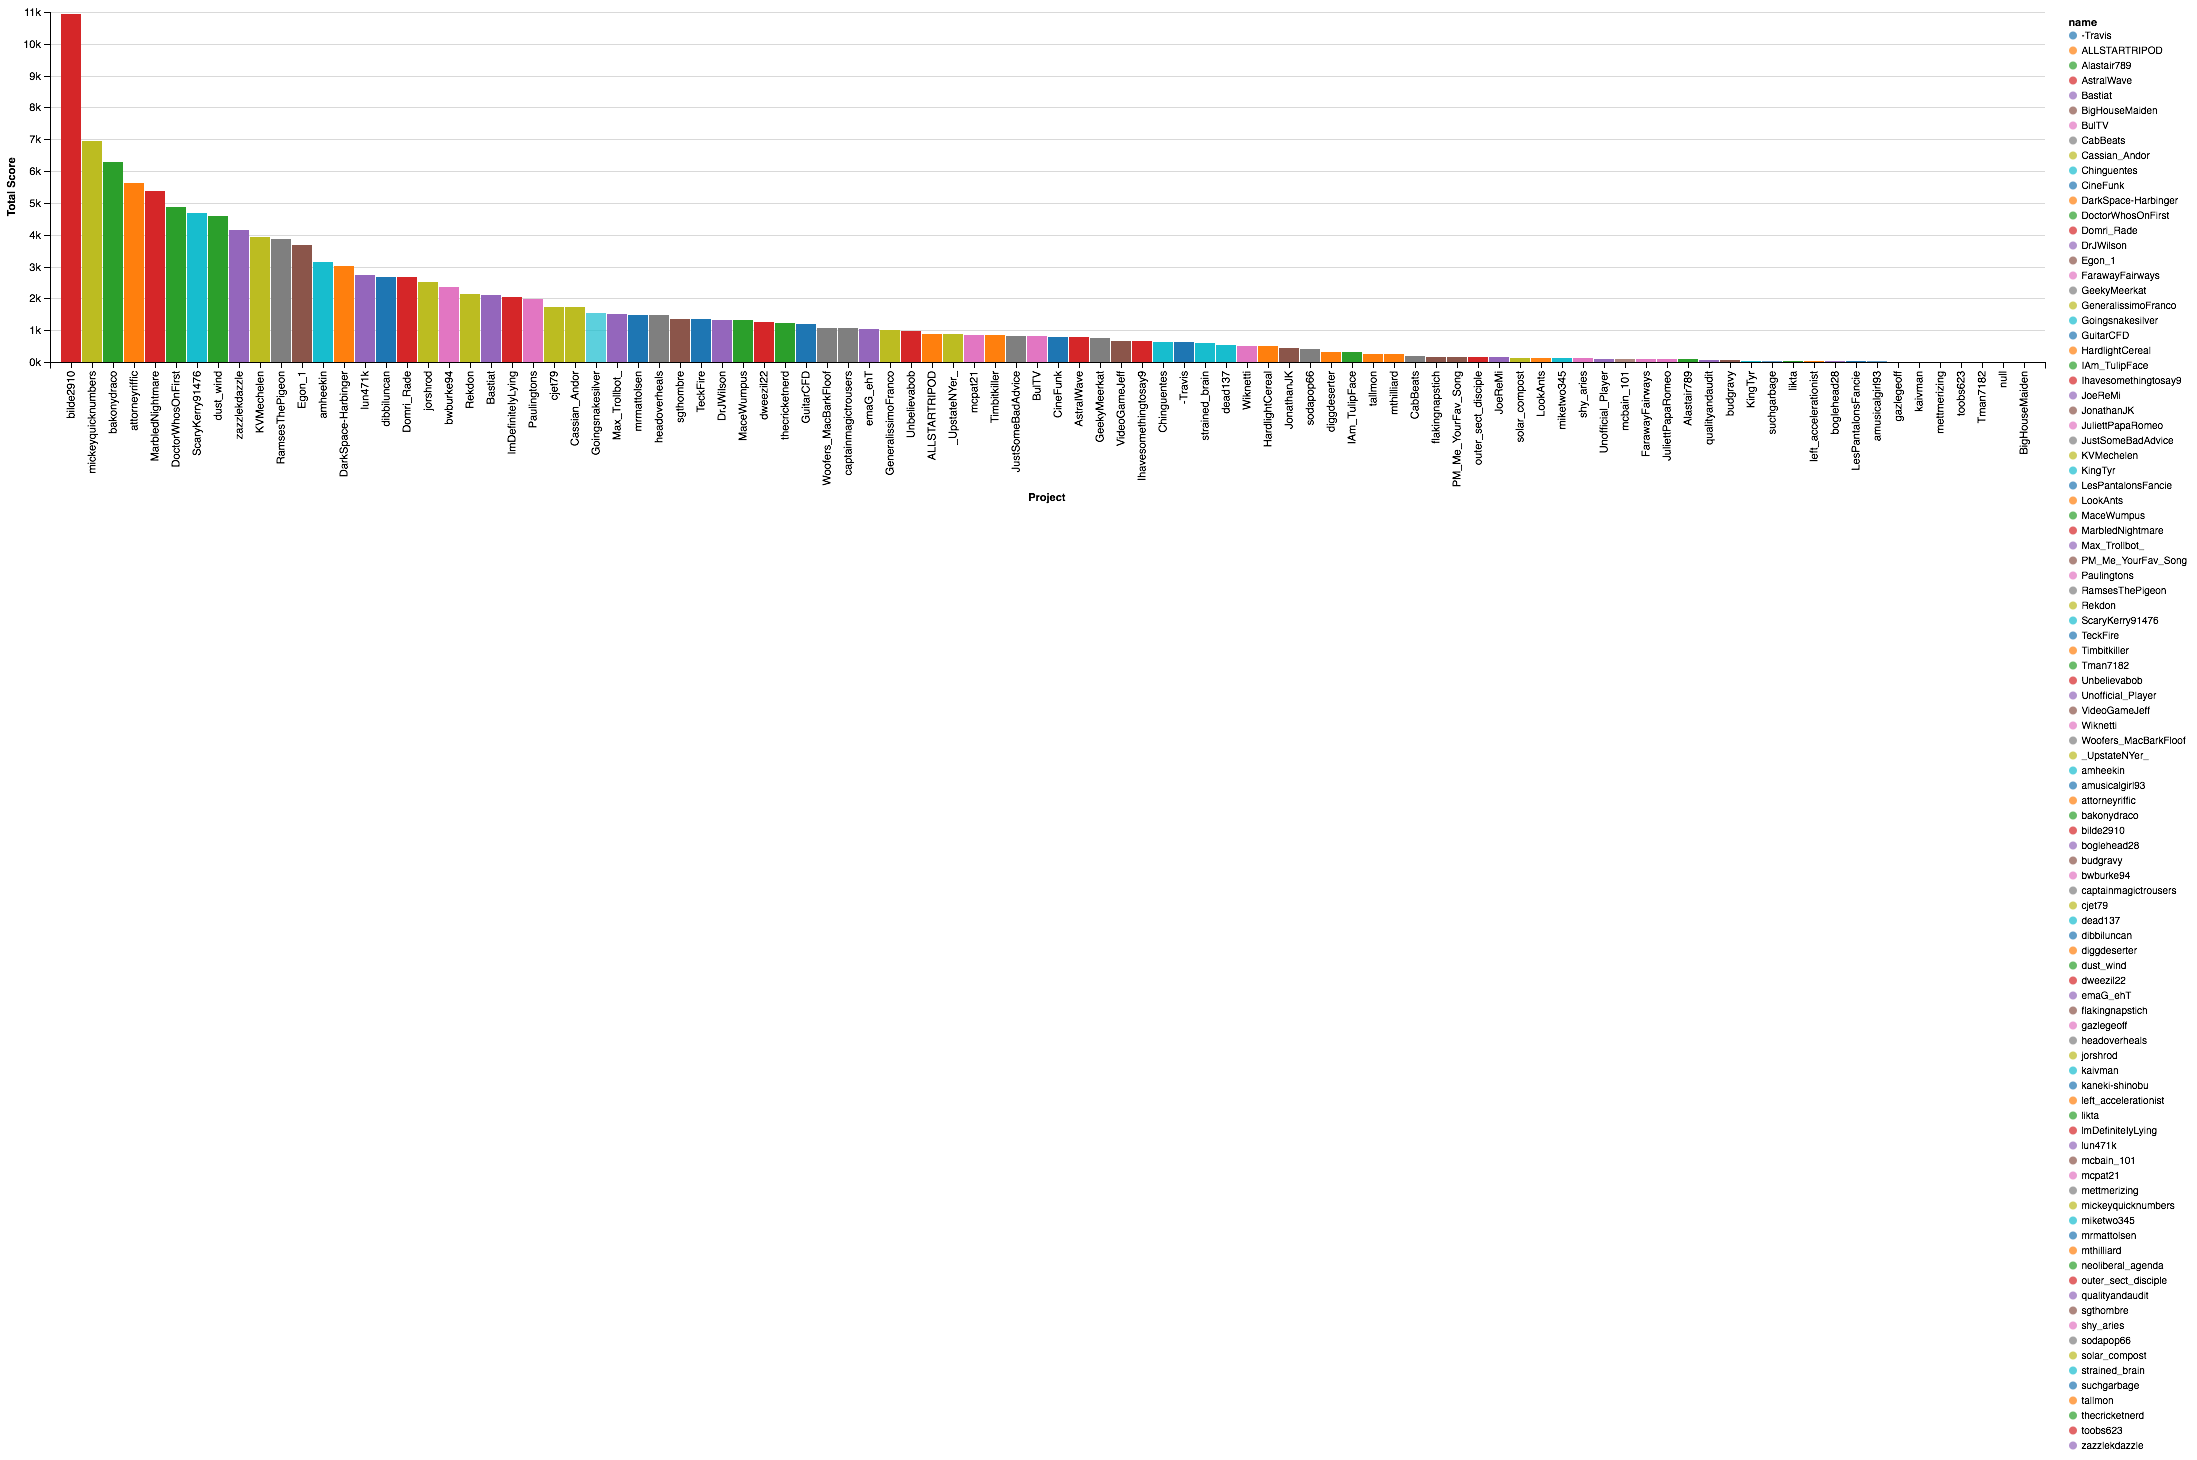

In [5]:
Chart(test).mark_bar().encode(
    x=X('Author:O', sort=SortField(field='Total_num_comments', order='descending', op='max'),
        axis=Axis(title='Project')),
    y=Y('Total_num_comments:Q',
        axis=Axis(title='Total Score')),
    color ="name"
        )

In [115]:
Chart(test).mark_line().encode(
    x=X('Submission_Created:T', timeUnit="month"),
    y=Y('Total_score'))